# HR 데이터 분석 1주차 과제 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns


plt.rcParams['font.family'] = 'AppleGothic'

## **[과제1]** 우리 회사의 우수 성과자들은 어떤 특성을 가지고 있는가?

 구성원의 업무 성과별 다음 요인의 특징을 표와 그래프로 정리해주세요.

### 1) 경력기간(TotalWorkingYears) : 예) 업무 성과가 낮은 사람의 경력기간을 추출하여 특징을 그래프로 표현

In [27]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT TotalWorkingYears, 
       CASE WHEN PerformanceRating = 3 THEN 'Low' 
            WHEN PerformanceRating = 4 THEN 'High' 
       END AS Performance 
FROM HR_data;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['TotalWorkingYears', 'Performance'])




/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


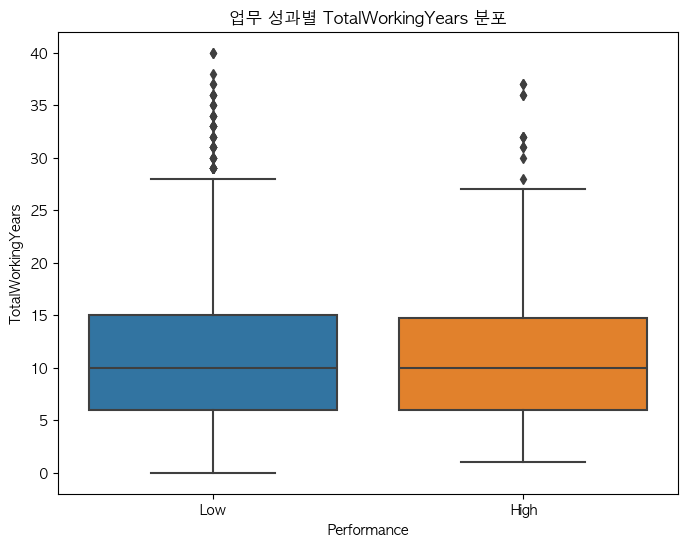

In [39]:
# 'Low'와 'High'에 해당하는 데이터 추출
low_performance = df[df['Performance'] == 'Low']['TotalWorkingYears']
high_performance = df[df['Performance'] == 'High']['TotalWorkingYears']

# 데이터프레임 생성
data = pd.DataFrame({'Low': low_performance, 'High': high_performance})

# boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xlabel('Performance')
plt.ylabel('TotalWorkingYears')
plt.title('업무 성과별 TotalWorkingYears 분포')
plt.show()

### 2) 일과 생활의 균형 정도(WorkLiffeBalance) : 예) 업무 성과가 낮은 사람의 일과 생활의 균형 정도를 추출하여 특징을 그래프로 표현

In [45]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT  WorkLifeBalance,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
        WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['WorkLifeBalance', 'Performance'])




In [46]:
df.head()

,WorkLifeBalance,Performance
0,1,Low
1,3,High
2,3,Low
3,3,Low
4,3,Low


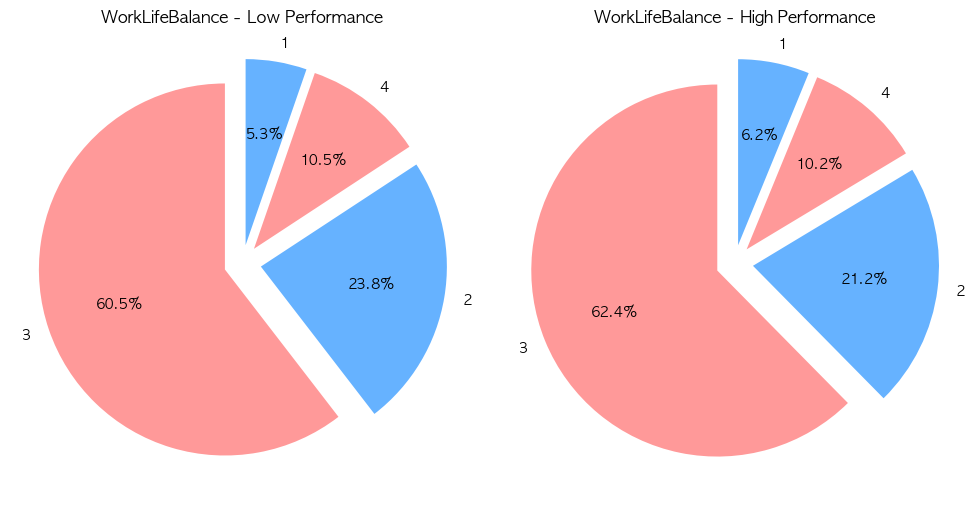

In [54]:
# Performance에 따른 데이터 필터링
low_performance = df[df['Performance'] == 'Low']
high_performance = df[df['Performance'] == 'High']

# Performance에 따른 WorkLifeBalance 빈도 계산
low_counts = low_performance['WorkLifeBalance'].value_counts()
high_counts = high_performance['WorkLifeBalance'].value_counts()

# 파이 차트 
labels = ['Low', 'High']
colors = ['#FF9999', '#66B2FF']
explode = [0.1] * len(low_counts)  # explode의 길이를 low_counts의 개수와 동일하게 설정

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Low Performance에 대한 파이 차트
ax1.pie(low_counts, labels=low_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('WorkLifeBalance - Low Performance')

# High Performance에 대한 파이 차트
ax2.pie(high_counts, labels=high_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax2.set_title('WorkLifeBalance - High Performance')

plt.tight_layout()
plt.show()


### 3) 마지막 승진(YearsSinceLastPromotion)

 : 예) 업무 성과가 낮은 사람의 마지막 승진과의 관련성을 추출하여 그래프로 표현

In [55]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT YearsSinceLastPromotion,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
		WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data hd 
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['YearsSinceLastPromotion', 'Performance'])




In [60]:
df['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


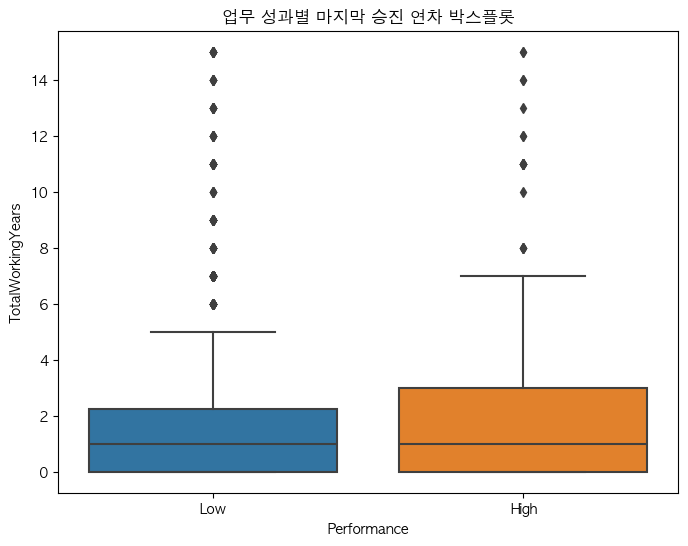

In [63]:
# 'Low'와 'High'에 해당하는 데이터 추출
low_performance = df[df['Performance'] == 'Low']['YearsSinceLastPromotion']
high_performance = df[df['Performance'] == 'High']['YearsSinceLastPromotion']

# 데이터프레임 생성
data = pd.DataFrame({'Low': low_performance, 'High': high_performance})

# boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xlabel('Performance')
plt.ylabel('TotalWorkingYears')
plt.title('업무 성과별 마지막 승진 연차 박스플롯')
plt.show()

### 4) 규정외 노동시간(Overtime)

 : 예) 업무 성과가 낮은 사람의 초과근무 특징을 추출하여 그래프로 표현

In [224]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT Overtime, 
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
		WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Overtime', 'Performance'])




In [225]:
df['Overtime'].unique()

array(['Yes', 'No'], dtype=object)

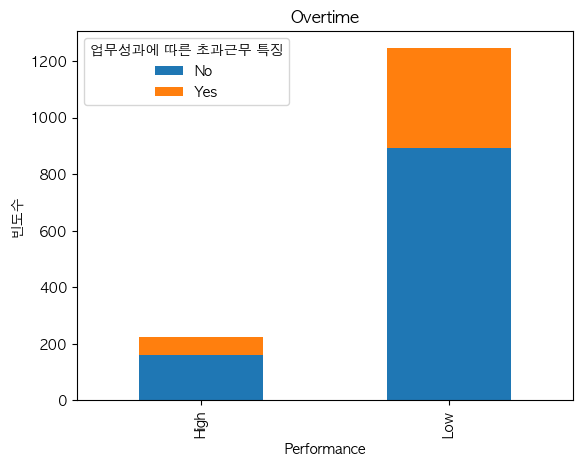

In [74]:
# 'Performance'에 따른 'Overtime'의 빈도수 계산
counts = df.groupby('Performance')['Overtime'].value_counts().unstack()

# 히스토그램 그리기
counts.plot(kind='bar', stacked=True)

# 축 및 제목 설정
plt.xlabel('Performance')
plt.ylabel('빈도수')
plt.title('Overtime')

plt.legend(title='업무성과에 따른 초과근무 특징')

plt.show()


In [226]:
result = df.groupby('Performance')['Overtime'].value_counts(normalize=True)
print(result)

Performance  Overtime
High         No          0.712389
             Yes         0.287611
Low          No          0.717846
             Yes         0.282154
Name: proportion, dtype: float64


### 5) 스톡옵션 정도(StockOptionLevel)

: 예) 업무 성과가 낮은 사람의 스톡옵션과의 연관성을 추출하여 그래프로 표현

In [148]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT StockOptionLevel,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
        WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data hd 
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['StockOptionLevel', 'Performance'])




In [149]:
df.describe()

,StockOptionLevel
count,1470.000000
mean,0.793878
std,0.852077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


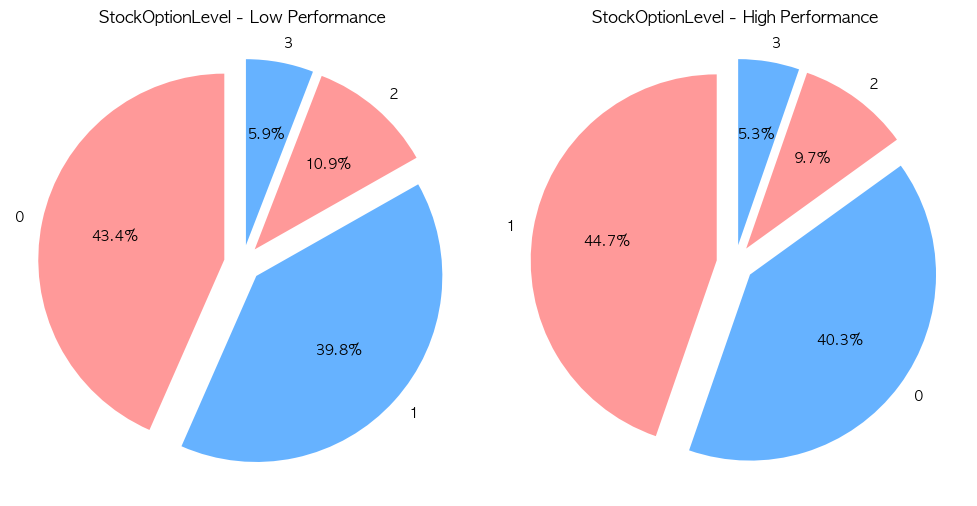

In [160]:
# Performance에 따른 데이터 필터링
low_performance = df[df['Performance'] == 'Low']
high_performance = df[df['Performance'] == 'High']

# Performance에 따른 StockOptionLevel 빈도 계산
low_counts = low_performance['StockOptionLevel'].value_counts()
high_counts = high_performance['StockOptionLevel'].value_counts()

# 파이 차트 
labels = ['Low', 'High']
colors = ['#FF9999', '#66B2FF']
explode = [0.1] * len(low_counts)  # explode의 길이를 low_counts의 개수와 동일하게 설정
startangle = 90 # 시작 각도를 0도로 설정

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Low Performance에 대한 파이 차트
ax1.pie(low_counts, labels=low_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=startangle)
ax1.set_title('StockOptionLevel - Low Performance')

# High Performance에 대한 파이 차트
ax2.pie(high_counts, labels=high_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=startangle)
ax2.set_title('StockOptionLevel - High Performance')

plt.tight_layout()
plt.show()

## 회사 우수 성과자의 특성 

In [205]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행 및 결과를 데이터프레임으로 저장
query = "SELECT * FROM HR_data"
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()


/var/folders/d1/k8w7ydl912db_c31zskh1q700000gn/T/ipykernel_1539/1720313864.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [208]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 업무 성과와의 상관계수 확인 

In [209]:
# 수치형 변수만 선택
numeric_columns = df.select_dtypes(include=['int', 'float'])

# 상관 관계 계산
correlation_matrix = numeric_columns.corr()

# Performance 열과 다른 열들 간의 상관 계수 확인
performance_correlation = correlation_matrix['PerformanceRating'].drop('PerformanceRating')

# 상관 계수를 내림차순으로 정렬
performance_correlation_sorted = performance_correlation.sort_values(ascending=False)

# 결과 출력
print(performance_correlation_sorted)

PercentSalaryHike           0.773550
YearsInCurrentRole          0.034986
DistanceFromHome            0.027110
YearsWithCurrManager        0.022827
YearsSinceLastPromotion     0.017896
TotalWorkingYears           0.006744
StockOptionLevel            0.003506
YearsAtCompany              0.003435
WorkLifeBalance             0.002572
JobSatisfaction             0.002297
Age                         0.001904
DailyRate                   0.000473
HourlyRate                 -0.002172
MonthlyRate                -0.009811
NumCompaniesWorked         -0.014095
TrainingTimesLastYear      -0.015579
MonthlyIncome              -0.017120
EmployeeNumber             -0.020359
JobLevel                   -0.021222
Education                  -0.024539
JobInvolvement             -0.029071
EnvironmentSatisfaction    -0.029548
RelationshipSatisfaction   -0.031351
EmployeeCount                    NaN
StandardHours                    NaN
Name: PerformanceRating, dtype: float64


#### Random Forest를 통한 Feature importances 확인 

In [215]:
from sklearn.ensemble import RandomForestRegressor



# 피처와 타겟 변수 분리
X = numeric_columns.drop('PerformanceRating', axis=1)
y = numeric_columns['PerformanceRating']

# RandomForest 모델 학습
rf = RandomForestRegressor()
rf.fit(X, y)

# 피처 중요도 확인
feature_importance = rf.feature_importances_

# 결과 출력
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")


Age: 0.0
DailyRate: 0.0
DistanceFromHome: 0.0
Education: 0.0
EmployeeCount: 0.0
EmployeeNumber: 0.0
EnvironmentSatisfaction: 0.0
HourlyRate: 0.0
JobInvolvement: 0.0
JobLevel: 0.0
JobSatisfaction: 0.0
MonthlyIncome: 0.0
MonthlyRate: 0.0
NumCompaniesWorked: 0.0
PercentSalaryHike: 1.0
RelationshipSatisfaction: 0.0
StandardHours: 0.0
StockOptionLevel: 0.0
TotalWorkingYears: 0.0
TrainingTimesLastYear: 0.0
WorkLifeBalance: 0.0
YearsAtCompany: 0.0
YearsInCurrentRole: 0.0
YearsSinceLastPromotion: 0.0
YearsWithCurrManager: 0.0


### 문자형 변수

#### BusinessTravel

In [221]:
result = df.groupby('PerformanceRating')['BusinessTravel'].value_counts(normalize=True)
print(result

PerformanceRating  BusinessTravel   
3                  Travel_Rarely        0.714630
                   Travel_Frequently    0.185691
                   Non-Travel           0.099678
4                  Travel_Rarely        0.681416
                   Travel_Frequently    0.203540
                   Non-Travel           0.115044
Name: proportion, dtype: float64


#### JobLevel

In [223]:
result = df.groupby('PerformanceRating')['JobLevel'].value_counts(normalize=True)
print(result)

PerformanceRating  JobLevel
3                  1           0.365756
                   2           0.364952
                   3           0.148714
                   4           0.070740
                   5           0.049839
4                  1           0.389381
                   2           0.353982
                   3           0.146018
                   4           0.079646
                   5           0.030973
Name: proportion, dtype: float64


### 분석

#### 1) 교우 관계 만족도(RelationshipSatisfaction)

In [169]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT RelationshipSatisfaction,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
        WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data hd 
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['RelationshipSatisfaction', 'Performance'])




In [170]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3])

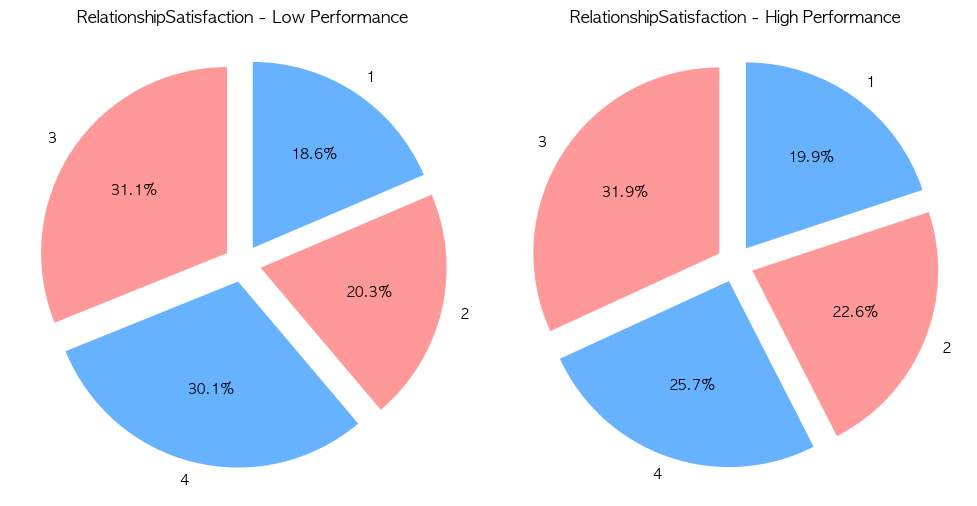

In [171]:
# Performance에 따른 데이터 필터링
low_performance = df[df['Performance'] == 'Low']
high_performance = df[df['Performance'] == 'High']

# Performance에 따른 StockOptionLevel 빈도 계산
low_counts = low_performance['RelationshipSatisfaction'].value_counts()
high_counts = high_performance['RelationshipSatisfaction'].value_counts()

# 파이 차트 
labels = ['Low', 'High']
colors = ['#FF9999', '#66B2FF']
explode = [0.1] * len(low_counts)  # explode의 길이를 low_counts의 개수와 동일하게 설정

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Low Performance에 대한 파이 차트
ax1.pie(low_counts, labels=low_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('RelationshipSatisfaction - Low Performance')

# High Performance에 대한 파이 차트
ax2.pie(high_counts, labels=high_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax2.set_title('RelationshipSatisfaction - High Performance')

plt.tight_layout()
plt.show()


#### 2) 연봉 상승률 (PercentSalaryHike)

In [233]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT PercentSalaryHike,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
        WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data hd 
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['PercentSalaryHike', 'Performance'])




In [234]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

In [235]:
df.head()

,PercentSalaryHike,Performance
0,11,Low
1,23,High
2,15,Low
3,11,Low
4,12,Low


/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/donggunhan/Documents/Visual Studio Code/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


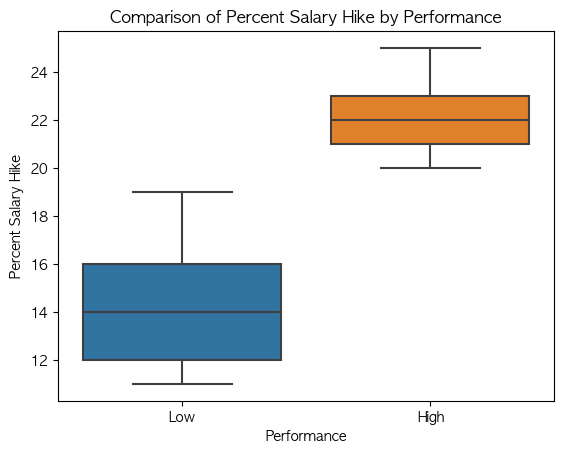

In [236]:


# Performance가 'Low'인 데이터
low_performance = df[df['Performance'] == 'Low']
# Performance가 'High'인 데이터
high_performance = df[df['Performance'] == 'High']

## 박스 플롯 그리기
sns.boxplot(x='Performance', y='PercentSalaryHike', data=df)
plt.xlabel('Performance')
plt.ylabel('Percent Salary Hike')
plt.title('Comparison of Percent Salary Hike by Performance')
plt.show()


#### 업무환경 만족도(EnvironmentSatisfaction )

In [163]:
# DB 접속
conn = pymysql.connect(host='localhost', user='root', password=' ', db='mysql', charset='utf8')
cursor = conn.cursor()

# SQL 쿼리 실행
sql = """
SELECT StockOptionLevel,
	CASE
    	WHEN PerformanceRating = 3 THEN 'Low'
        WHEN PerformanceRating = 4 THEN 'High'
	  END AS Performance
	FROM HR_data hd 
;

"""
cursor.execute(sql)

# 데이터 가져오기
data = cursor.fetchall()

# DB 연결 종료
conn.close()


# 데이터프레임 생성
df = pd.DataFrame(data, columns=['EnvironmentSatisfaction', 'Performance'])




In [164]:
df.head

<bound method NDFrame.head of       EnvironmentSatisfaction Performance
0                           0         Low
1                           1        High
2                           0         Low
3                           0         Low
4                           1         Low
...                       ...         ...
1465                        1         Low
1466                        1         Low
1467                        1        High
1468                        0         Low
1469                        0         Low

[1470 rows x 2 columns]>

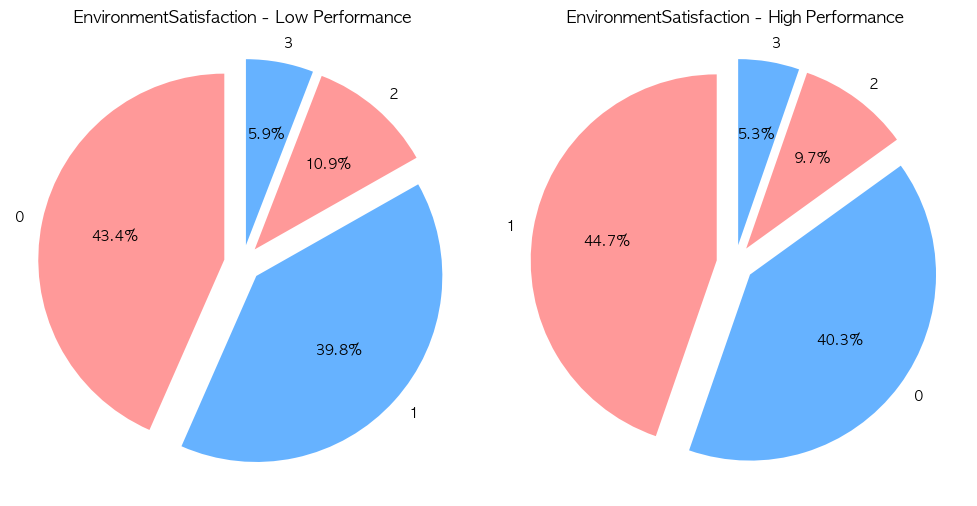

In [165]:
# Performance에 따른 데이터 필터링
low_performance = df[df['Performance'] == 'Low']
high_performance = df[df['Performance'] == 'High']

# Performance에 따른 EnvironmentSatisfaction 빈도 계산
low_counts = low_performance['EnvironmentSatisfaction'].value_counts()
high_counts = high_performance['EnvironmentSatisfaction'].value_counts()

# 파이 차트 
labels = ['Low', 'High']
colors = ['#FF9999', '#66B2FF']
explode = [0.1] * len(low_counts)  # explode의 길이를 low_counts의 개수와 동일하게 설정

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Low Performance에 대한 파이 차트
ax1.pie(low_counts, labels=low_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('EnvironmentSatisfaction - Low Performance')

# High Performance에 대한 파이 차트
ax2.pie(high_counts, labels=high_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
ax2.set_title('EnvironmentSatisfaction - High Performance')

plt.tight_layout()
plt.show()


In [168]:
print(low_counts,high_counts)

EnvironmentSatisfaction
0    540
1    495
2    136
3     73
Name: count, dtype: int64 EnvironmentSatisfaction
1    101
0     91
2     22
3     12
Name: count, dtype: int64


In [141]:
print(sum(low_counts),sum(high_counts))

1244 226
